# LSEG

# Mergin Macro, Financials, and Sentiment

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
df_b = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /lseg_fundamental_and_macro.csv')
df_d = pd.read_csv('/content/drive/MyDrive/Dissertation_Final /Data/Pre-processed /lseg_text_classified.csv')

## Fundamental and Macro

In [6]:
df_b.head(3)

,Unnamed: 0.1,Instrument,Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,...,Month,Unnamed: 0,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,0,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31 00:00:00+00:00,7.743000e+09,6.679000e+09,...,12,25,45850.426122,NaN,7.922049,NaN,NaN,-1.112864e+11,0.811302,21.053388
1,1,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2022-12-31 00:00:00+00:00,7.743000e+09,6.679000e+09,...,12,25,45850.426122,NaN,7.922049,NaN,NaN,-1.112864e+11,0.811302,21.053388
2,2,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,...,12,21,46585.897564,NaN,2.518371,NaN,186.481994,-3.856365e+10,0.727065,22.384975


In [7]:
df_b.columns

Index(['Unnamed: 0.1', 'Instrument', 'Name', 'Country',
       'TRBC Industry Group Name', 'GICS Sector Name', 'Currency', 'Date',
       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio',
       'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio',
       'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares',
       'Year', 'Month', 'Unnamed: 0', 'GDP', 'Stock traded pct GDP',
       'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
       'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')

In [8]:
# Drop index
columns_to_drop = ['Unnamed: 0','Unnamed: 0.1']
df_b = df_b.drop(columns=columns_to_drop)

## Classified text

In [9]:
df_d.head(3)

,Unnamed: 0,Instrument,Activation Date,Guidance Measure,Guidance Text,The Doc Type,num_tokens,preprocessed_text,sentiment_results,sentiment_score,esg_classification,esg_classification_score,fls_classification,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical,Year,Month
0,12,LSEG.L,2021-03-05 07:00:03+00:00,Revenue,5-7% Total Income (excluding recoveries) CAGR ...,Press Release,59,5-7 % total income ( excluding recovery ) cagr...,"{'label': 'Neutral', 'score': 0.9993962049484253}",0.999396,"{'label': 'None', 'score': 0.9837270975112915}",0.983727,"{'label': 'Not FLS', 'score': 0.8151842355728149}",0.815184,0,4,2,2021,3
1,13,LSEG.L,2021-03-05 09:00:00+00:00,Revenue,How much should we think is netted off for the...,Transcript,29,"much think netted synergy 2021 , guess , full ...","{'label': 'Neutral', 'score': 0.9997803568840027}",0.999780,"{'label': 'None', 'score': 0.9469303488731384}",0.946930,"{'label': 'Not FLS', 'score': 0.8872433304786682}",0.887243,0,4,2,2021,3
2,14,LSEG.L,2021-07-02 12:00:01+00:00,Revenue,CAGR) in the total market for Data & Analytics...,Press Release,158,"cagr ) total market data & analytics . event ,...","{'label': 'Positive', 'score': 0.9999123811721...",0.999912,"{'label': 'None', 'score': 0.8084553480148315}",0.808455,"{'label': 'Specific FLS', 'score': 0.462712168...",0.462712,1,4,1,2021,7


In [10]:
df_d.columns

Index(['Unnamed: 0', 'Instrument', 'Activation Date', 'Guidance Measure',
       'Guidance Text', 'The Doc Type', 'num_tokens', 'preprocessed_text',
       'sentiment_results', 'sentiment_score', 'esg_classification',
       'esg_classification_score', 'fls_classification',
       'fls_classification_score', 'sentiment_numerical', 'esg_numerical',
       'fls_numerical', 'Year', 'Month'],
      dtype='object')

In [11]:
# Drop columns
columns_to_drop = ['Unnamed: 0']
df_d = df_d.drop(columns=columns_to_drop)

# Merging

In [ ]:
# Drop columns
columns_to_drop = ['Activation Date',
       'num_tokens', 'sentiment_results',
       'esg_classification',  'fls_classification']
df_d = df_d.drop(columns=columns_to_drop)

In [ ]:
print(df_b.columns)
print(df_d.columns)

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'Year', 'Month', 'GDP',
       'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP'],
      dtype='object')
Index(['Instrument', 'Guidance Measure', 'Guidance Text', 'The Doc Type',
       'preprocessed_text', 'sentiment_score', 'esg_classification_score',
       'fls_classification_score', 'sentiment_numerical', 'esg_numerical',
       'fls_numerical', 'Year', 'Month'],
      dtype='object')


In [ ]:
print(df_b.dtypes)
print(df_d.dtypes) # the data type has to be changed

Instrument                         object
Name                               object
Country                            object
TRBC Industry Group Name           object
GICS Sector Name                   object
Currency                           object
Date                               object
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
Year                              

In [ ]:
print(df_b.shape)
print(df_d.shape)

(315, 35)
(2375, 19)


## Creating the quarters

In [ ]:
df_b['Year'] = df_b['Year'].astype(int)
df_b['Month'] = df_b['Month'].astype(int)

In [ ]:
df_b['Quarter'] = ((df_b['Month'] - 1) // 3) + 1
df_d['Quarter'] = ((df_d['Month'] - 1) // 3) + 1

In [ ]:
merged_df = pd.merge(df_b, df_d, on=['Instrument', 'Year', 'Quarter'], how='inner')
merged_df.shape

(1534, 45)

In [ ]:
merged_df.columns

Index(['Instrument', 'Name', 'Country', 'TRBC Industry Group Name',
       'GICS Sector Name', 'Currency', 'Date', 'Revenue', 'Gross Profit',
       'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
       'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Dividend Yield',
       'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio', 'Total Debt',
       'WACC pct', 'Outstanding Tot Shares', 'Year', 'Month_x', 'GDP',
       'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
       'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
       'Government Consumption pct GDP', 'Quarter', 'Guidance Measure',
       'Guidance Text', 'The Doc Type', 'preprocessed_text', 'sentiment_score',
       'esg_classification_score', 'fls_classification_score',
       'sentiment_numerical', 'esg_numerical', 'fls_numerical', 'Month_y'],
      dtype='object')

In [ ]:
merged_df.head(3)

,Instrument,Name,Country,TRBC Industry Group Name,GICS Sector Name,Currency,Date,Revenue,Gross Profit,EBIT,...,Guidance Text,The Doc Type,preprocessed_text,sentiment_score,esg_classification_score,fls_classification_score,sentiment_numerical,esg_numerical,fls_numerical,Month_y
0,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,increase by 4-6% annually over the medium term...,Press Release,"increase 4-6 % annually medium term , reflecti...",1.0,0.849568,0.833536,1,2,2,10
1,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,increase by 4-6% annually over the medium term...,Press Release,"increase 4-6 % annually medium term , reflecti...",1.0,0.849568,0.833536,1,2,2,10
2,LSEG.L,London Stock Exchange Group PLC,United Kingdom,Investment Banking & Investment Services,Financials,GBP,2021-12-31 00:00:00+00:00,6.535000e+09,5.676000e+09,1.406000e+09,...,increase by 4-6% annually over the medium term...,Press Release,"increase 4-6 % annually medium term , reflecti...",1.0,0.849568,0.833536,1,2,2,10


# Re-Organising the columns

In [ ]:
df = merged_df[['Instrument', 'Name', 'Country', 'TRBC Industry Group Name', 'GICS Sector Name', 'Currency',
         'Year', 'Quarter', 'Month_x', 'Date',
         'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities', 'Enterprise Value',
         'Free Cash Flow', 'PE Ratio', 'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio', 'Quick Ratio',
         'Total Debt', 'WACC pct', 'Outstanding Tot Shares',
         'GDP', 'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct', 'Government Debt pct GDP',
         'Balance of Trade', 'Exchange Rate USD', 'Government Consumption pct GDP',
         'Guidance Measure', 'Guidance Text', 'The Doc Type', 'preprocessed_text',
         'sentiment_score', 'esg_classification_score', 'fls_classification_score',
         'sentiment_numerical', 'esg_numerical', 'fls_numerical', 'Month_y']]

In [ ]:
df = df.drop(columns=['preprocessed_text', 'Guidance Text','GICS Sector Name'])#-3

In [ ]:
df.shape

(1534, 42)

# Missing values

In [ ]:
# Count NaN values in each column of the DataFrame
nan_counts = df.isna().sum()

# Display the counts of NaN values
print(nan_counts)

Instrument                          0
Name                                0
Country                             0
TRBC Industry Group Name            0
Currency                            0
Year                                0
Quarter                             0
Month_x                             0
Date                                0
Revenue                             0
Gross Profit                       22
EBIT                                0
EBITDA                              0
Total Assets                        0
Total Liabilities                   0
Enterprise Value                    0
Free Cash Flow                      0
PE Ratio                            0
Dividend Yield                    121
Net Profit Margin pct               0
Current Ratio                      56
Quick Ratio                        56
Total Debt                          0
WACC pct                            0
Outstanding Tot Shares              0
GDP                                 0
Stock traded

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Instantiate the IterativeImputer
imputer = IterativeImputer()

# Select the columns you want to impute
cols_to_impute  = ['Gross Profit','Dividend Yield', 'Current Ratio','Quick Ratio','Stock traded pct GDP',
                   'Unemployment Rate pct','Government Debt pct GDP','Government Consumption pct GDP']



# Apply the imputer to these columns
df[cols_to_impute] = imputer.fit_transform(df[cols_to_impute])

# Encoding

In [ ]:
df.shape

(1534, 42)

In [ ]:
df_f = df.copy() #CHECKPOINT

In [ ]:
df_f.to_csv('lseg_total.csv')

In [ ]:
columns_to_drop = ['Name','Date','Currency','Country','Month_y'] #-5
df_f = df_f.drop(columns=columns_to_drop)

In [ ]:
df_f.dtypes

Instrument                         object
TRBC Industry Group Name           object
Year                                int64
Quarter                             int64
Month_x                             int64
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
GDP                               float64
Stock traded pct GDP              float64
Inflation pct                     

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Encode the specified columns and store the encoded values in new columns
df_f['Instrument_encoded'] = encoder.fit_transform(df_f['Instrument'])
df_f['TRBC_Industry_encoded'] = encoder.fit_transform(df_f['TRBC Industry Group Name'])

df_f['Guidance Measure_encoded'] = encoder.fit_transform(df_f['Guidance Measure'])
df_f['Doc_Type_encoded'] = encoder.fit_transform(df_f['The Doc Type'])
#+4

In [ ]:
df_f.to_csv('lseg_encoded_translation.csv')

In [ ]:
# Specify the order of columns
new_column_order = ['Instrument_encoded',
       'TRBC_Industry_encoded', 'Year','Quarter', 'Month_x','Month_y',#general
                    'Forward EV/EBITDA',#target

       'Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets',
       'Total Liabilities', 'Enterprise Value', 'Free Cash Flow', 'PE Ratio',
       'Dividend Yield', 'Net Profit Margin pct', 'Current Ratio',
       'Quick Ratio', 'Total Debt', 'WACC pct', 'Outstanding Tot Shares',
                    'EV/EBITDA','P/E','Forward P/E',#financials

        'sentiment_numerical','sentiment_score',
            'esg_numerical' ,  'esg_classification_score',
              'fls_numerical'  ,     'fls_classification_score',#classifcation
       'GDP', 'Stock traded pct GDP', 'Inflation pct', #macro
       'Unemployment Rate pct', 'Government Debt pct GDP', 'Balance of Trade',
       'Exchange Rate USD', 'Government Consumption pct GDP']

# Reindex the DataFrame with the new column order
df_f = df_f.reindex(columns=new_column_order)

In [ ]:
df_f.shape

(1534, 40)

In [ ]:
df_f.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,7,0,2021,4,12,NaN,NaN,6.535000e+09,5.676000e+09,1.406000e+09,...,2,0.833536,46585.897564,-542.379142,2.518371,15.469965,186.481994,-3.856365e+10,0.727065,22.384975
1,7,0,2021,4,12,NaN,NaN,6.535000e+09,5.676000e+09,1.406000e+09,...,2,0.833536,46585.897564,-542.379142,2.518371,15.469965,186.481994,-3.856365e+10,0.727065,22.384975
2,7,0,2021,4,12,NaN,NaN,6.535000e+09,5.676000e+09,1.406000e+09,...,2,0.833536,46585.897564,-542.379142,2.518371,15.469965,186.481994,-3.856365e+10,0.727065,22.384975


In [ ]:
df_f.dtypes

Instrument_encoded                  int64
TRBC_Industry_encoded               int64
Year                                int64
Quarter                             int64
Month_x                             int64
Month_y                           float64
Forward EV/EBITDA                 float64
Revenue                           float64
Gross Profit                      float64
EBIT                              float64
EBITDA                            float64
Total Assets                      float64
Total Liabilities                 float64
Enterprise Value                  float64
Free Cash Flow                    float64
PE Ratio                          float64
Dividend Yield                    float64
Net Profit Margin pct             float64
Current Ratio                     float64
Quick Ratio                       float64
Total Debt                        float64
WACC pct                          float64
Outstanding Tot Shares            float64
EV/EBITDA                         

In [ ]:
df_f.to_csv('lseg_encoded.csv')

# Transformations

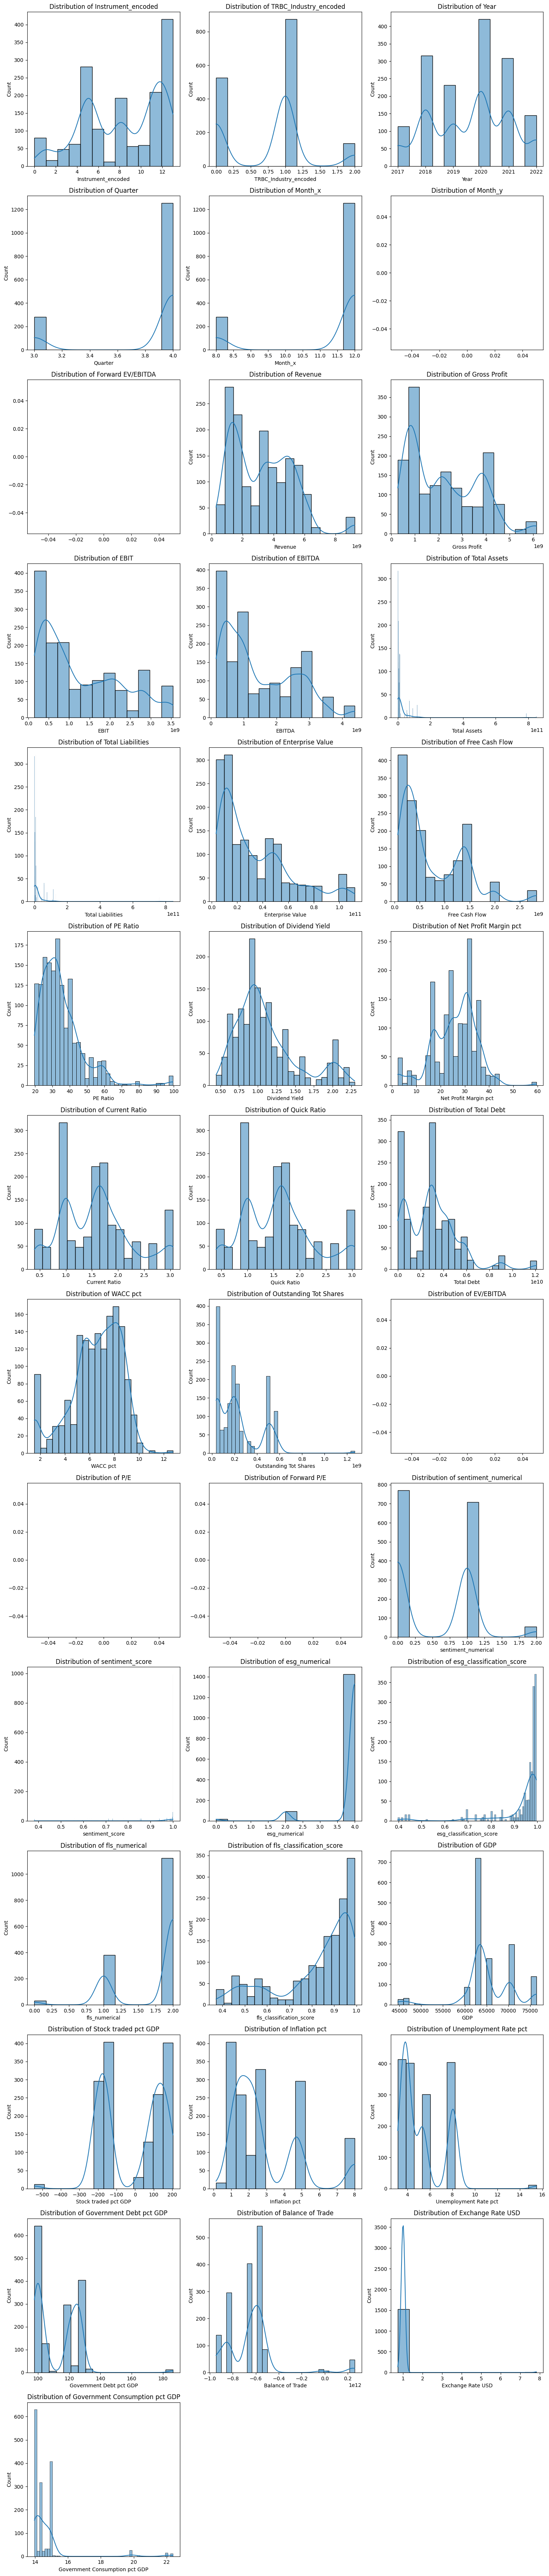

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_f.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_f, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Distribution statistics

In [ ]:
import pandas as pd

# Central Tendency
mean_values = df_f.mean(axis=0)  # axis=0 calculates the mean for each column
median_values = df_f.median(axis=0)
mode_values = df_f.mode(axis=0).iloc[0]  # In case of multiple modes, you can select the first one

# Variability
range_values = df_f.max() - df_f.min()
variance_values = df_f.var()
std_deviation_values = df_f.std()

# Skewness and Kurtosis
skewness_values = df_f.skew()
kurtosis_values = df_f.kurtosis()

# Quantiles
quartiles = df_f.quantile([0.25, 0.5, 0.75], axis=0)  # axis=0 calculates the quantiles for each column

In [ ]:
import pandas as pd

summary_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values,
    'Range': range_values,
    'Variance': variance_values,
    'Standard Deviation': std_deviation_values
})

summary_df

,Mean,Median,Mode,Range,Variance,Standard Deviation
Instrument_encoded,8.251630e+00,8.000000e+00,5.000000e+00,1.300000e+01,1.281466e+01,3.579757e+00
TRBC_Industry_encoded,7.457627e-01,1.000000e+00,1.000000e+00,2.000000e+00,3.658496e-01,6.048550e-01
Year,2.019606e+03,2.020000e+03,2.020000e+03,5.000000e+00,2.062878e+00,1.436272e+00
Quarter,3.816819e+00,4.000000e+00,4.000000e+00,1.000000e+00,1.497235e-01,3.869412e-01
Month_x,1.126728e+01,1.200000e+01,1.200000e+01,4.000000e+00,2.395575e+00,1.547765e+00
Month_y,NaN,NaN,NaN,NaN,NaN,NaN
Forward EV/EBITDA,NaN,NaN,NaN,NaN,NaN,NaN
Revenue,3.256237e+09,3.352655e+09,5.442856e+09,8.951610e+09,3.615439e+18,1.901431e+09
Gross Profit,2.211390e+09,1.980081e+09,3.912830e+09,5.853283e+09,2.070261e+18,1.438840e+09
EBIT,1.288747e+09,9.880809e+08,2.804073e+09,3.397771e+09,9.389107e+17,9.689740e+08


In [ ]:
# Skewness
skewness_values

Instrument_encoded                -0.342865
TRBC_Industry_encoded              0.185878
Year                              -0.111816
Quarter                           -1.639693
Month_x                           -1.639693
Month_y                                 NaN
Forward EV/EBITDA                       NaN
Revenue                            0.616159
Gross Profit                       0.608956
EBIT                               0.720768
EBITDA                             0.718230
Total Assets                       9.123202
Total Liabilities                  9.452015
Enterprise Value                   1.135712
Free Cash Flow                     1.180649
PE Ratio                           2.027256
Dividend Yield                     1.063972
Net Profit Margin pct             -0.419081
Current Ratio                      0.475040
Quick Ratio                        0.475040
Total Debt                         1.217271
WACC pct                          -0.694730
Outstanding Tot Shares          

In [ ]:
#Kurtosis
kurtosis_values

Instrument_encoded                 -1.077981
TRBC_Industry_encoded              -0.558901
Year                               -0.962169
Quarter                             0.689491
Month_x                             0.689491
Month_y                                  NaN
Forward EV/EBITDA                        NaN
Revenue                             0.131552
Gross Profit                       -0.533054
EBIT                               -0.687400
EBITDA                             -0.506737
Total Assets                       92.197699
Total Liabilities                  97.143123
Enterprise Value                    0.520013
Free Cash Flow                      1.072937
PE Ratio                            6.483340
Dividend Yield                      0.468089
Net Profit Margin pct               0.793822
Current Ratio                      -0.266012
Quick Ratio                        -0.266012
Total Debt                          2.703022
WACC pct                            0.159710
Outstandin

## Trasformations

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

# Make a copy of your dataframe
df_transformations = df_f.copy()

# Log transformation for high positive skewness
cols_log_transform = ['Revenue', 'Gross Profit', 'EBIT', 'EBITDA', 'Total Assets', 'Total Liabilities',
                      'Enterprise Value', 'Free Cash Flow', 'PE Ratio', 'Total Debt', 'Outstanding Tot Shares','EV/EBITDA']

# Square root transformation for moderate positive skewness
cols_sqrt_transform = ['Dividend Yield', 'Current Ratio']

# Power transformation for negative skewness
cols_power_transform = ['Net Profit Margin pct', 'esg_classification_score', 'fls_classification_score',
                        'esg_numerical', 'sentiment_score']

# Yeo-Johnson transformation for variables with more complicated distributions
cols_yeo_johnson_transform = ['Instrument_encoded', 'TRBC_Industry_encoded', 'Year', 'Quarter',
                              'Month_x', 'Month_y', 'WACC pct', 'sentiment_numerical', 'GDP',
                              'Stock traded pct GDP', 'Inflation pct', 'Unemployment Rate pct',
                              'Government Debt pct GDP', 'Balance of Trade', 'Exchange Rate USD',
                              'Government Consumption pct GDP']

# Log Transformation
for col in cols_log_transform:
    df_transformations[col] = np.log(df_transformations[col] + 1)  # We add 1 to avoid division by zero

# Square Root Transformation
for col in cols_sqrt_transform:
    df_transformations[col] = np.sqrt(df_transformations[col])

# Power Transformation
for col in cols_power_transform:
    df_transformations[col] = np.power(df_transformations[col], 2)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df_transformations[cols_yeo_johnson_transform] = pt.fit_transform(df_transformations[cols_yeo_johnson_transform])

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3291: RuntimeWarning: Degrees of freedom <= 0 for slice
  x_trans_var = x_trans.var()
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= co

In [ ]:
df_transformations.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16
1,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16
2,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16


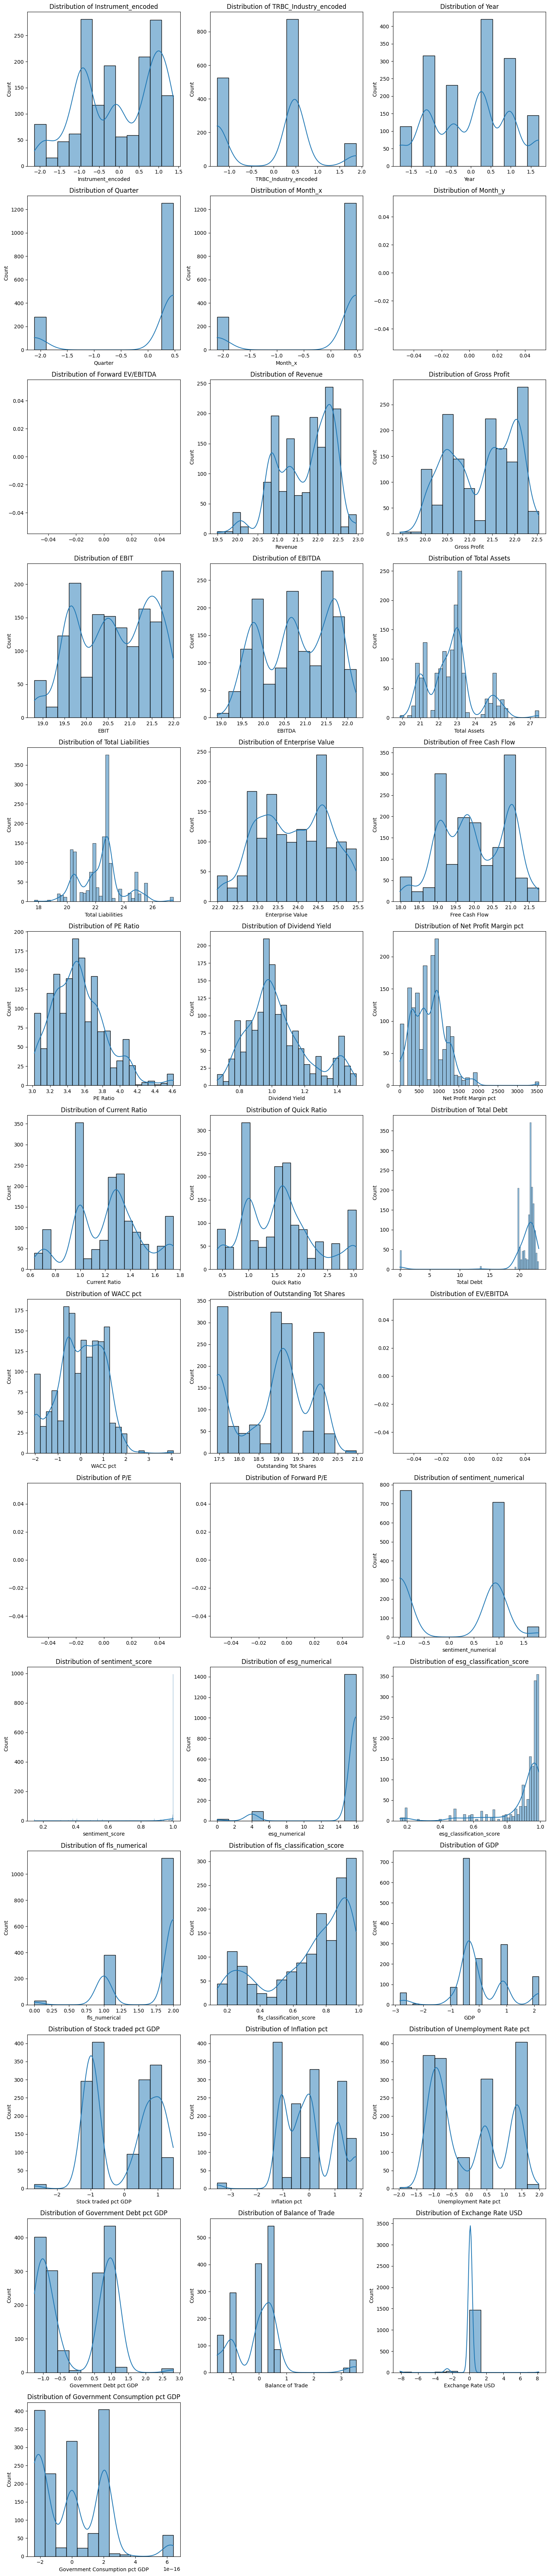

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Select numeric columns for plotting (excluding non-numeric columns)
numeric_columns = df_transformations.select_dtypes(include='number').columns

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows required for subplots
num_rows = (len(numeric_columns) - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes for easy iteration
axes = axes.ravel()

# Plot the distributions for each numeric column
for i, column in enumerate(numeric_columns):
    sns.histplot(data=df_transformations, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].remove()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Checking for NaN values in each column
nans = df_transformations.isna().sum()
print(nans)

Instrument_encoded                   0
TRBC_Industry_encoded                0
Year                                 0
Quarter                              0
Month_x                              0
Month_y                           1534
Forward EV/EBITDA                 1534
Revenue                              0
Gross Profit                         0
EBIT                                 0
EBITDA                               0
Total Assets                         0
Total Liabilities                    0
Enterprise Value                     0
Free Cash Flow                       0
PE Ratio                             0
Dividend Yield                       0
Net Profit Margin pct                0
Current Ratio                        0
Quick Ratio                          0
Total Debt                           0
WACC pct                             0
Outstanding Tot Shares               0
EV/EBITDA                         1534
P/E                               1534
Forward P/E              

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# fill the nan but keep the distributions
imputer = IterativeImputer()
df_transformations = pd.DataFrame(imputer.fit_transform(df_transformations), columns=df_transformations.columns)

ValueError: ignored

In [ ]:
df_transformations.to_csv('lseg_trasformed.csv')

# Multicollinearity

In [ ]:
#checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for calculating VIF
df_numeric = df_f.select_dtypes(include=[np.number])

# Add a constant column for the intercept term
df_numeric["Intercept"] = 1

# Calculate VIF for each numeric column
vif = pd.DataFrame()
vif["variables"] = df_numeric.columns
vif["VIF"] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]

print(vif)

# FINAL DF

In [ ]:
df.head(3)

In [ ]:
df_transformations.head(3)

,Instrument_encoded,TRBC_Industry_encoded,Year,Quarter,Month_x,Month_y,Forward EV/EBITDA,Revenue,Gross Profit,EBIT,...,fls_numerical,fls_classification_score,GDP,Stock traded pct GDP,Inflation pct,Unemployment Rate pct,Government Debt pct GDP,Balance of Trade,Exchange Rate USD,Government Consumption pct GDP
0,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16
1,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16
2,-0.386444,-1.2797,0.971704,0.473563,0.473563,NaN,NaN,22.600438,22.459513,21.064015,...,2,0.694782,-2.641883,-2.67966,0.144724,1.982164,2.813846,3.099699,-8.142652,6.383782e-16
